# Data Preparation

Load dataset

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def evaluate_model(model, X, y, y_pred=None, label="Training", model_name="model"):
  if y_pred is None:
    y_pred = model.predict(X)

  print(label + ' Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()

  print(classification_report(y, y_pred, digits=4))
  disp = plot_confusion_matrix(model, X, y, 
                               cmap=plt.cm.Blues, normalize='true')
  plt.savefig(model_name + "_" + label.lower() + ".eps")
  plt.show()
  print()

In [ ]:
import sys, os, re, json  # standard libraries for OS and regex processing and JSON handling
import nltk  # library for natural language processing tasks
import numpy as np  # numerical computing library
import pandas as pd  # library for working with tabular data
import matplotlib.pyplot as plt  # library for creating plots
import seaborn as sn  # library for making plots more attractive
from collections import defaultdict, Counter  # useful data structures for counting and dictionaries
from typing import List, Tuple, Dict  # library for type hints


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/ProgettiDataScience-SAD/2ANNO1SEMESTRE/TEXT MINING AND SEARCH/Poterti Sanvito/Progetto TextMining/BalancedData_Tokenized_StopWord_Stemmed_normalized_longreviews.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.columns.tolist())

['comment_count', 'game_id', 'language', 'last_played', 'num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'received_for_free', 'recommendationid', 'review', 'steam_purchase', 'steamid', 'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_funny', 'votes_up', 'weighted_vote_score', 'written_during_early_access', 'cleaned', 'num_words', 'reviewclean', 'reviewTextPreprocToken']


In [ ]:
df.head()

,comment_count,game_id,language,last_played,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,received_for_free,recommendationid,...,timestamp_updated,voted_up,votes_funny,votes_up,weighted_vote_score,written_during_early_access,cleaned,num_words,reviewclean,reviewTextPreprocToken
0,0,10,english,1.515866e+09,4,1,537.0,0.0,False,40600517,...,2018-03-06 05:22:48,False,6,0,0.426540,False,return want version counter strike like just c...,15,return version counter strike csgoodo pleas cu...,"['return', 'game', 'want', 'version', 'counter..."
1,0,10,english,1.520140e+09,35,15,189.0,0.0,False,40270344,...,2018-02-21 07:33:04,False,6,0,0.476190,False,hacker non vac protect server learn spanish co...,23,hacker everywher protect ta learn spanish coz ...,"['hackers', 'everywhere', 'nonvac', 'protected..."
2,0,10,english,1.521233e+09,63,3,3043.0,0.0,True,40013929,...,2018-02-11 23:27:55,False,6,0,0.416667,False,hello welcom incit review shall provid unknowl...,37,hello welcom incit shall provid inform regardl...,"['hello', 'welcome', 'inciteful', 'review', 's..."
3,0,10,english,1.518294e+09,261,249,18.0,0.0,False,39473465,...,2018-01-20 03:38:16,False,5,1,0.386740,False,join server spawn kill repeatedli hacker leaf ...,29,join spawn repeatedli hacker leav join leav jo...,"['joins', 'server', 'gets', 'spawn', 'killed',..."
4,1,10,english,1.511474e+09,57,3,23.0,0.0,False,39183370,...,2018-01-08 15:04:03,False,5,1,0.438977,False,realli want explain thing mewhi tf spend euro ...,26,someon explain tf spend euro outdat disabl tim...,"['really', 'want', 'someone', 'explain', 'one'..."


In [ ]:
print("Number of reviews:", len(df))

Number of reviews: 1104723


In [ ]:
del df['comment_count']
del df['game_id']
del df['last_played']
del df['num_games_owned']
del df['num_reviews']
del df['playtime_forever']
del df['playtime_last_two_weeks']
del df['received_for_free']
del df['recommendationid']
del df['steamid']
del df['timestamp_created']
del df['votes_funny']
del df['votes_up']
del df['weighted_vote_score']
del df['written_during_early_access']
del df['steam_purchase']
del df['timestamp_updated']
del df['reviewTextPreprocToken']
del df['cleaned']
del df['num_words']
del df['review']

In [ ]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [language, voted_up, reviewclean]
Index: []


# Data Distribution

In [ ]:
df['voted_up'] = df['voted_up'].apply(lambda x: 1 if x else 0)
df["voted_up"].value_counts(normalize=False)

0    644860
1    459863
Name: voted_up, dtype: int64

In [ ]:
def plot_labels(df, title=None):
  # count the number of occurrences of each star rating in the DataFrame and normalize the counts to obtain the ratio of each star rating
  ds_labels = df[title].value_counts(normalize=True)
  # sort the Series by the index (i.e., the star ratings)
  ds_labels.sort_index(inplace=True)
  # create a new figure using matplotlib
  plt.figure(figsize=(4,3))
  # plot the ds_labels Series as a bar plot
  ax = ds_labels.plot(kind="bar")
  # label the x-axis as "Stars"
  ax.set_xlabel(title)
  # label the y-axis as "Ratio"
  ax.set_ylabel("Ratio")
  # if a title is provided, save the plot as an EPS file using the title as the file name
  if title is not None:
    plt.savefig(title + ".eps")
  # display the plot using matplotlib
  plt.show()


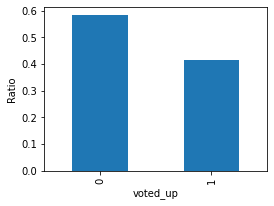

In [ ]:
plot_labels(df, "voted_up")

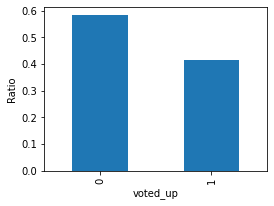

In [ ]:
plot_labels(df, "voted_up")

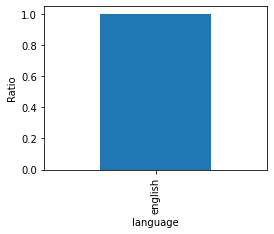

In [ ]:
plot_labels(df, "language")

In [ ]:
del df['language']

# Data Preprocessing and Split

In [ ]:
#invert voted_up and reviewclean position
df = df[['reviewclean', 'voted_up']]


In [ ]:
df.head()

,reviewclean,voted_up
0,return version counter strike csgoodo pleas cu...,0
1,hacker everywher protect ta learn spanish coz ...,0
2,hello welcom incit shall provid inform regardl...,0
3,join spawn repeatedli hacker leav join leav jo...,0
4,someon explain tf spend euro outdat disabl tim...,0


In [ ]:
from sklearn.model_selection import train_test_split

# randomly split the df_review DataFrame into two new DataFrames, df_train_raw and df_test, using a test size of 250000 samples and a random seed of 42
df_train_raw, df_test = train_test_split(df, train_size=50000, 
                                         random_state=42, shuffle=True)
# randomly split the df_train_raw DataFrame into two new DataFrames, df_train_raw and df_dev, using the same test size and random seed as before
df_train, df_dev = train_test_split(df_train_raw, test_size=10000,
                                        random_state=42, shuffle=True)


In [ ]:
from sklearn.utils import resample


def downsample(df):  
  df_majority = df[df.voted_up==0]
  df_minority = df[df.voted_up==1]


  # Downsample the majority class
  df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=df_minority.shape[0],    # to match minority class
                                 random_state=123) # reproducible results

  # Combine minority class with downsampled majority class
  df_downsampled = pd.concat([df_minority, df_majority_downsampled])

  return df_downsampled

In [ ]:
df_train = downsample(df_train_raw)

In [ ]:
# create variables that store the number of rows in the df_review, df_train, df_dev, and df_test DataFrames
num_review = df.shape[0]  # number of rows in df_review
num_train = df_train.shape[0]  # number of rows in df_train
num_dev = df_dev.shape[0]  # number of rows in df_dev
num_test = df_test.shape[0]  # number of rows in df_test


(41750, 2)


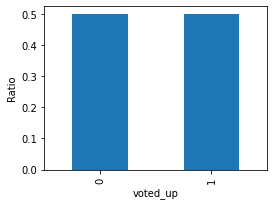

In [ ]:
print(df_train.shape)
plot_labels(df_train, "voted_up")

(10000, 2)


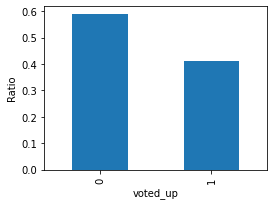

In [ ]:
print(df_dev.shape)
plot_labels(df_dev,  "voted_up")

(1054723, 2)


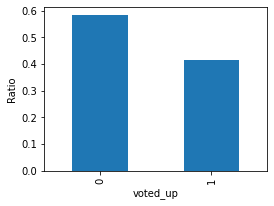

In [ ]:
print(df_test.shape)
plot_labels(df_test,  "voted_up")

In [ ]:
# # add a new column called "labels" to the df_train, df_dev, and df_test DataFrames
# # by subtracting 1 from the "stars" column in each DataFrame
# df_train["labels"] = df_train["stars"] - 1
# df_dev["labels"] = df_dev["stars"] - 1
# df_test["labels"] = df_test["stars"] - 1


In [ ]:

df_train.head(10)

,reviewclean,voted_up
853693,serious bbut ill downb uprosu hell frequent sp...,1
1067973,heard whoever creat must music catchi aar meh ...,1
1053534,experiment mashup ubisoft playground divis far...,1
705846,aspect netcod tho patch freez caus stuck load ...,1
1086342,jump window offic ran across rooftop ran bomb ...,1
1013729,limbo hear playdead instantli familiar style c...,1
1001876,badg deserv echo ost echo plot echo neat easte...,1
1084504,highli tactic teamori execut brilliant common ...,1
950794,gnomoria uniqu style interfac similar genr dif...,1
801279,alway caught eye glad replay custom choic plat...,1


# Feature Engineering

# Tokenization


In [ ]:
# import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

In [ ]:
# apply two transformations to the first 10 rows of the "text" column in the df_train DataFrame and print the original text and the transformed text for the first row
ds_temp = df_train["reviewclean"].iloc[:10].map(
    # use a regular expression to replace all characters that are not letters, numbers, apostrophes, or spaces in the text with a space
    lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)
    # split the text into a list of individual words
    ).map(lambda text: text.split())

# print the original text and the transformed text for the first row
print(df_train["reviewclean"].iloc[0], '\n', ds_temp.iloc[0])


serious bbut ill downb uprosu hell frequent spoilerif unlik mespoil endless posibl soundtrack tool load frickin block potato comput spoilerlik uconsu sometim conclus spoileri forgot add gender 
 ['serious', 'bbut', 'ill', 'downb', 'uprosu', 'hell', 'frequent', 'spoilerif', 'unlik', 'mespoil', 'endless', 'posibl', 'soundtrack', 'tool', 'load', 'frickin', 'block', 'potato', 'comput', 'spoilerlik', 'uconsu', 'sometim', 'conclus', 'spoileri', 'forgot', 'add', 'gender']


In [ ]:
# apply two transformations to the "text" column in the df_train DataFrame and store the transformed text in a new column called "tokens"
# use a regular expression to replace all characters that are not letters, numbers, apostrophes, or spaces in the text with a space
# split the text into a list of individual words

df_train["tokens"] = df_train["reviewclean"].map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)).map(lambda text: text.split())



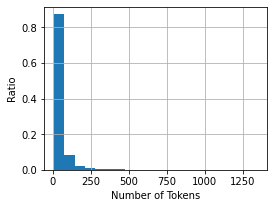

In [ ]:
# create a new column called "num_tokens" in the df_train DataFrame that contains the number of tokens (i.e., words) in each review
df_train["num_tokens"] = df_train["tokens"].map(len)

# create a histogram that shows the distribution of the number of tokens in the reviews
# set the number of bins (or bars) in the histogram to 20
# set the size of the figure to 4 inches by 3 inches
# normalize the counts so that the sum of the heights of the bars is equal to 1
# set the label of the x-axis to "Number of Tokens"
# set the label of the y-axis to "Ratio"
ax = df_train["num_tokens"].hist(bins=20, 
                                 figsize=(4,3),
                                 weights=np.ones(num_train)/num_train)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")

# show the histogram
plt.show()


In [ ]:
print(len(df_train[df_train["num_tokens"] <= 128]) / len(df_train["num_tokens"]))
print(len(df_train[df_train["num_tokens"] <= 256]) / len(df_train["num_tokens"]))
print(len(df_train[df_train["num_tokens"] <= 384]) / len(df_train["num_tokens"]))
     

0.945748502994012
0.9870658682634731
0.9961197604790419


In [ ]:
# drop the "tokens" and "num_tokens" columns from the df_train DataFrame
# make the changes directly to the df_train DataFrame
df_train.drop(columns=["tokens", "num_tokens"], inplace=True)

In [ ]:
# create a new column called "num_tokens" in the df_review DataFrame that contains the number of tokens (i.e., words) in each review
# use a regular expression to replace all characters that are not letters, numbers, apostrophes, or spaces in the text with a space
# split the text into a list of individual words
# count the number of words in the list
%time df["num_tokens"] = df["reviewclean"].\
map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)).\
map(lambda text: len(text.split()))


CPU times: user 4.79 s, sys: 18.3 ms, total: 4.8 s
Wall time: 4.87 s


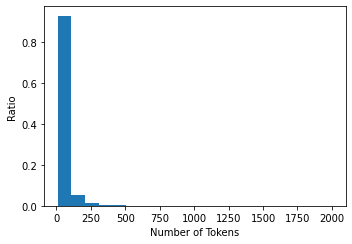

In [ ]:
# create a histogram that shows the distribution of the number of tokens in the reviews
# set the number of bins (or bars) in the histogram to 20
# set the size of the figure to 5 inches by 3.5 inches
# turn off the grid lines
# normalize the counts so that the sum of the heights of the bars is equal to 1
# set the label of the x-axis to "Number of Tokens"
# set the label of the y-axis to "Ratio"
# save the figure to a file called "num_tokens.eps"
# adjust the layout of the figure to fit the contents of the figure
# show the histogram

ax = df["num_tokens"].hist(bins=20,
                                  figsize=(5,3.5),
                                  grid=False,
                                  weights=np.ones(num_review)/num_review)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.savefig("num_tokens.eps")
plt.tight_layout()
plt.show()

In [ ]:
print(len(df[df["num_tokens"] <= 128]) / len(df["num_tokens"]))
print(len(df[df["num_tokens"] <= 256]) / len(df["num_tokens"]))
print(len(df[df["num_tokens"] <= 384]) / len(df["num_tokens"]))

0.9441507056520051
0.9873570116671782
0.9961003799142409


In [ ]:
# drop the "num_tokens" column from the df_review DataFrame
# make the changes directly to the df_review DataFrame
df.drop(columns=["num_tokens"], inplace=True)

# Experiments and Results

In [ ]:
df_test = df_test.sample(10000, random_state=1)

In [ ]:
df_test = downsample(df_test)

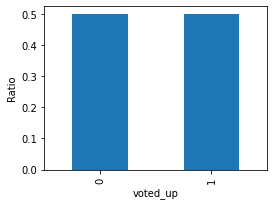

In [ ]:
plot_labels(df_test, "voted_up")

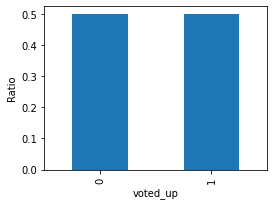

In [ ]:
plot_labels(df_train, "voted_up")

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
%pip install torch
%pip install simpletransformers
from simpletransformers.classification import ClassificationModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def evaluate_bert_model_one(model, df, label="Training", model_name="model"):
  y = df['voted_up'].tolist()
  y_pred, raw_outputs = model.predict(df['reviewclean'].tolist())

  print(label + ' Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()

  print(classification_report(y, y_pred, digits=4))
  df_cm = pd.DataFrame(confusion_matrix(y, y_pred, normalize='true'), 
                       range(0,2), range(0,2))
  plt.figure(figsize=(6,4))
  ax = sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')
  plt.savefig(model_name + "_" + label.lower() + ".eps")
  plt.show()

  fpr, tpr, thresholds = roc_curve(df['voted_up'], raw_outputs[:, 1])

  # Plot the ROC curve
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

  print()

In [ ]:
def evaluate_bert_model(model, model_name="model"):
  evaluate_bert_model_one(model, df_train, label="Training", model_name=model_name)
  evaluate_bert_model_one(model, df_dev, label="Validation", model_name=model_name)
  evaluate_bert_model_one(model, df_test, label="Testing", model_name=model_name)
  

### Uncased BERT

In [ ]:
model_bert_base_uncased = \
ClassificationModel('bert',
                    'bert-base-uncased',
                    num_labels=2,
                    args={"output_dir": "outputs_bert_base_uncased/",
                          "best_model_dir": "outputs_bert_base_uncased/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 32,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model_bert_base_uncased.train_model(df_train, eval_df=df_dev)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/41750 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1305 [00:00<?, ?it/s]

(1305, 0.47268913098221993)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8413

              precision    recall  f1-score   support

           0     0.8812    0.8442    0.8623      5887
           1     0.7897    0.8371    0.8127      4113

    accuracy                         0.8413     10000
   macro avg     0.8354    0.8407    0.8375     10000
weighted avg     0.8436    0.8413    0.8419     10000



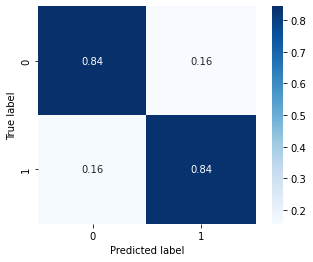

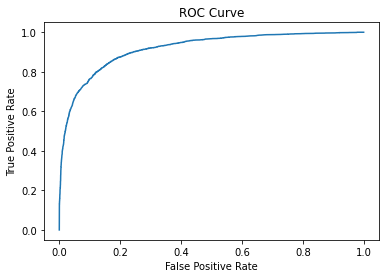

  0%|          | 0/8316 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

Testing Set
Accuracy: 0.8196248196248196

              precision    recall  f1-score   support

           0     0.8151    0.8268    0.8209      4158
           1     0.8243    0.8124    0.8183      4158

    accuracy                         0.8196      8316
   macro avg     0.8197    0.8196    0.8196      8316
weighted avg     0.8197    0.8196    0.8196      8316



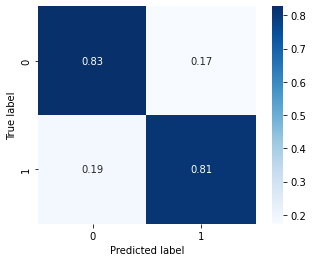

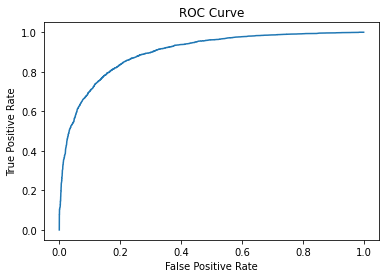

In [ ]:
evaluate_bert_model(model_bert_base_uncased, model_name="bert-base-uncased")

In [ ]:
del model_bert_base_uncased

### Uncased Large BERT

In [ ]:
# del model_bert_base_cased
model_bert_large_uncased = \
ClassificationModel('bert',
                    'bert-large-uncased',
                    num_labels=2,
                    args={"output_dir": "outputs_bert_base_uncased/",
                          "best_model_dir": "outputs_bert_base_uncased/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 32,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})



Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model_bert_large_uncased.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1305 [00:00<?, ?it/s]

(1305, 0.5431965962223623)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.816

              precision    recall  f1-score   support

           0     0.8427    0.8453    0.8440      5887
           1     0.7775    0.7741    0.7758      4113

    accuracy                         0.8160     10000
   macro avg     0.8101    0.8097    0.8099     10000
weighted avg     0.8159    0.8160    0.8159     10000



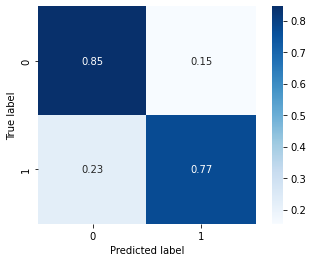

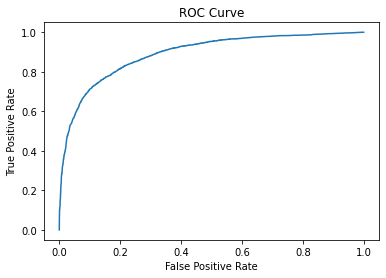

  0%|          | 0/8316 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

Testing Set
Accuracy: 0.8023088023088023

              precision    recall  f1-score   support

           0     0.7832    0.8360    0.8087      4158
           1     0.8241    0.7686    0.7954      4158

    accuracy                         0.8023      8316
   macro avg     0.8037    0.8023    0.8021      8316
weighted avg     0.8037    0.8023    0.8021      8316



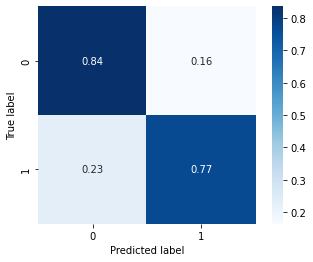

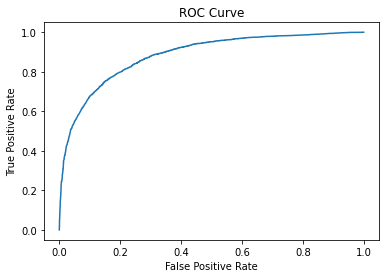

In [ ]:
evaluate_bert_model(model_bert_large_uncased, model_name="bert_large_uncased")

In [ ]:
del model_bert_large_uncased

### Uncased DistilBERT

In [ ]:
model_distilbert_base_uncased = \
ClassificationModel('distilbert', 
                    'distilbert-base-uncased', 
                    num_labels=2,
                    args={"output_dir": "outputs_distilbert_base_uncased/",
                          "best_model_dir": "outputs_distilbert_base_uncased/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 32,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})



Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model_distilbert_base_uncased.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/41750 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1305 [00:00<?, ?it/s]

(1305, 0.4659443143912202)

  0%|          | 0/41750 [00:00<?, ?it/s]

  0%|          | 0/5219 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8472574850299401

              precision    recall  f1-score   support

           0     0.8267    0.8787    0.8519     20875
           1     0.8705    0.8159    0.8423     20875

    accuracy                         0.8473     41750
   macro avg     0.8486    0.8473    0.8471     41750
weighted avg     0.8486    0.8473    0.8471     41750



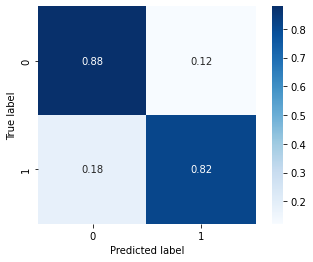

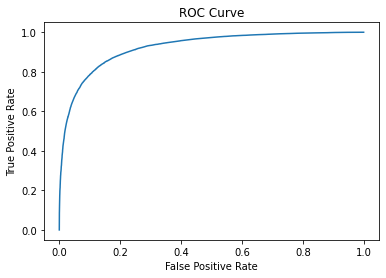

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8402

              precision    recall  f1-score   support

           0     0.8628    0.8663    0.8646      5887
           1     0.8075    0.8028    0.8052      4113

    accuracy                         0.8402     10000
   macro avg     0.8352    0.8346    0.8349     10000
weighted avg     0.8401    0.8402    0.8401     10000



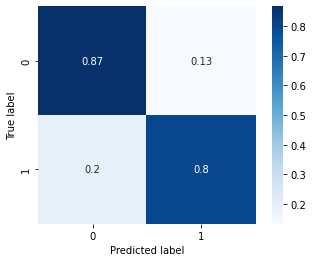

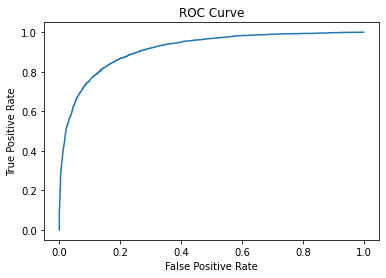

  0%|          | 0/8316 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

Testing Set
Accuracy: 0.8201058201058201

              precision    recall  f1-score   support

           0     0.8010    0.8519    0.8256      4158
           1     0.8418    0.7884    0.8142      4158

    accuracy                         0.8201      8316
   macro avg     0.8214    0.8201    0.8199      8316
weighted avg     0.8214    0.8201    0.8199      8316



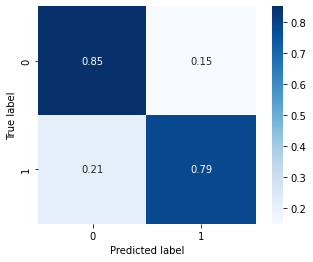

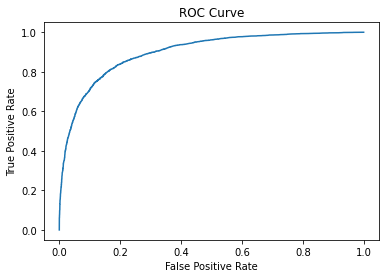

In [ ]:
evaluate_bert_model(model_distilbert_base_uncased, model_name="distilbert_base_uncased")

In [ ]:
del model_distilbert_base_uncased

### RoBERTa

In [ ]:
model_roberta_base = \
ClassificationModel('roberta', 
                    'roberta-base', 
                    num_labels=2,
                    args={"output_dir": "outputs_roberta_base/",
                          "best_model_dir": "outputs_roberta_base/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 32,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 10000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 10000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model_roberta_base.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/41750 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1305 [00:00<?, ?it/s]

(1305, 0.47764311382596975)

  0%|          | 0/41750 [00:00<?, ?it/s]

  0%|          | 0/5219 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8455329341317366

              precision    recall  f1-score   support

           0     0.8321    0.8658    0.8486     20875
           1     0.8601    0.8252    0.8423     20875

    accuracy                         0.8455     41750
   macro avg     0.8461    0.8455    0.8455     41750
weighted avg     0.8461    0.8455    0.8455     41750



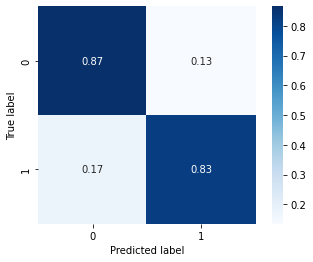

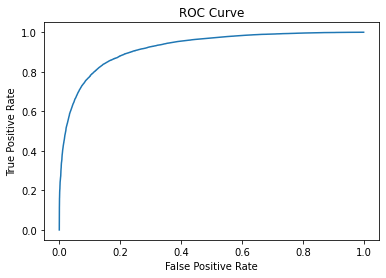

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8427

              precision    recall  f1-score   support

           0     0.8718    0.8592    0.8654      5887
           1     0.8025    0.8191    0.8107      4113

    accuracy                         0.8427     10000
   macro avg     0.8371    0.8391    0.8381     10000
weighted avg     0.8433    0.8427    0.8429     10000



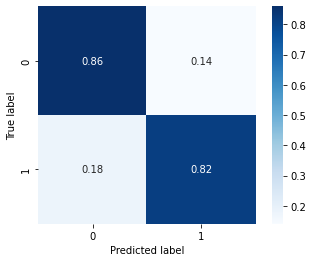

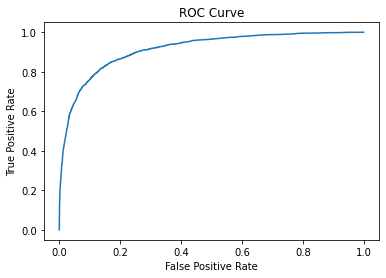

  0%|          | 0/8316 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

Testing Set
Accuracy: 0.8195045695045695

              precision    recall  f1-score   support

           0     0.8090    0.8365    0.8225      4158
           1     0.8307    0.8025    0.8164      4158

    accuracy                         0.8195      8316
   macro avg     0.8199    0.8195    0.8195      8316
weighted avg     0.8199    0.8195    0.8195      8316



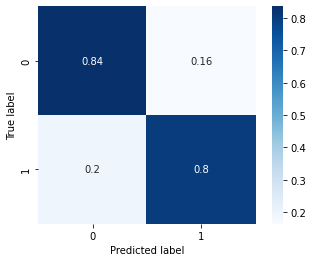

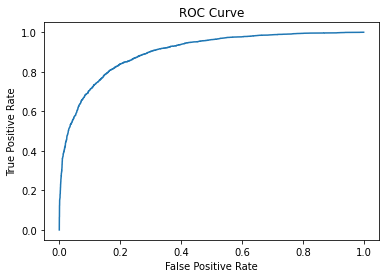

In [ ]:
evaluate_bert_model(model_roberta_base, model_name="roberta_base")

In [ ]:
del model_roberta_base